As adapted from [SHAP](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20LightGBM.html)

In [29]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

import shap

# print the JS visualization code to the notebook
shap.initjs()

from IPython.display import HTML

import graphviz
import seaborn as sns
import pandas as pd


In [30]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

<Axes: >

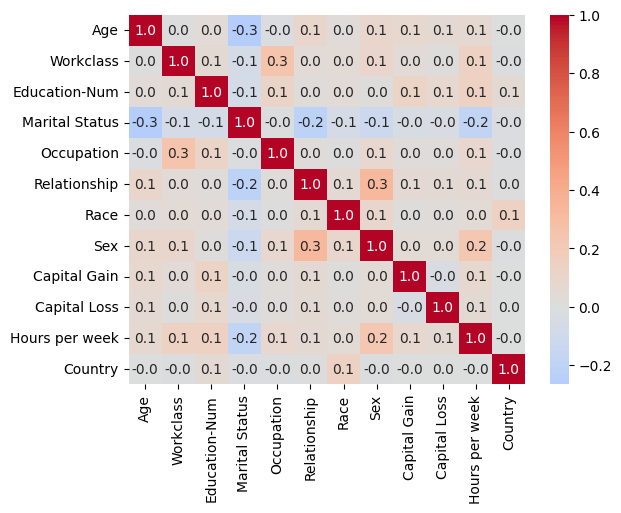

In [31]:
corr_matrix = pd.DataFrame(X).corr()

sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".1f")

In [32]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True,
    "early_stopping_round": 50,
}

model = lgb.train(
    params,
    d_train,
    10000,
    valid_sets=[d_test],
)

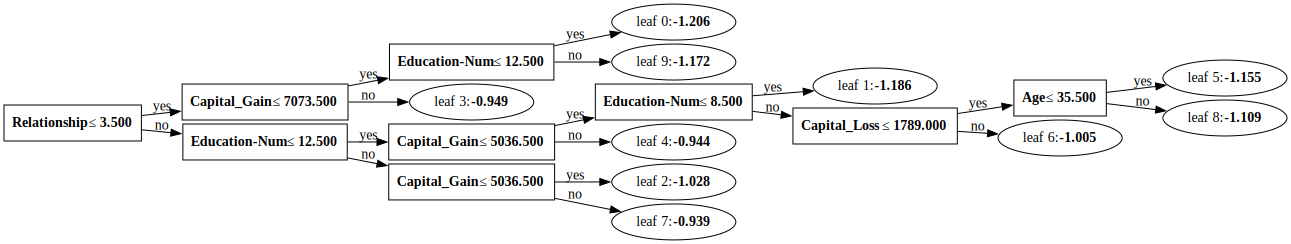

In [33]:
lgb.create_tree_digraph(model)

In [34]:
params_100 = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 100,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True,
    "early_stopping_round": 50,
}

model_100 = lgb.train(
    params,
    d_train,
    10000,
    valid_sets=[d_test],
)

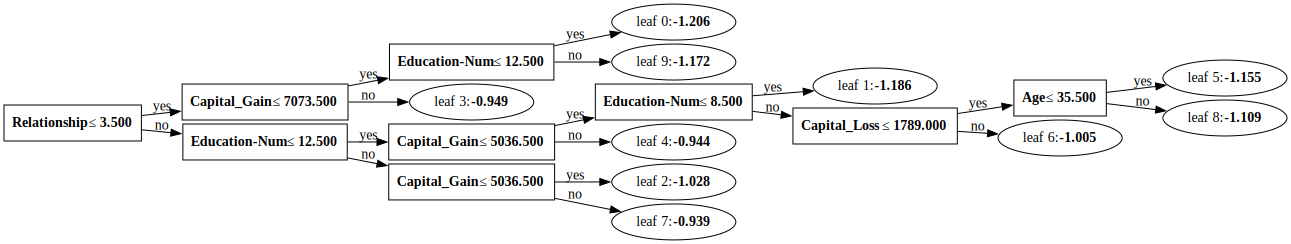

In [35]:
lgb.create_tree_digraph(model_100)

In [36]:
params_1000 = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 1000,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True,
    "early_stopping_round": 50,
}

model_1000 = lgb.train(
    params,
    d_train,
    10000,
    valid_sets=[d_test],
)

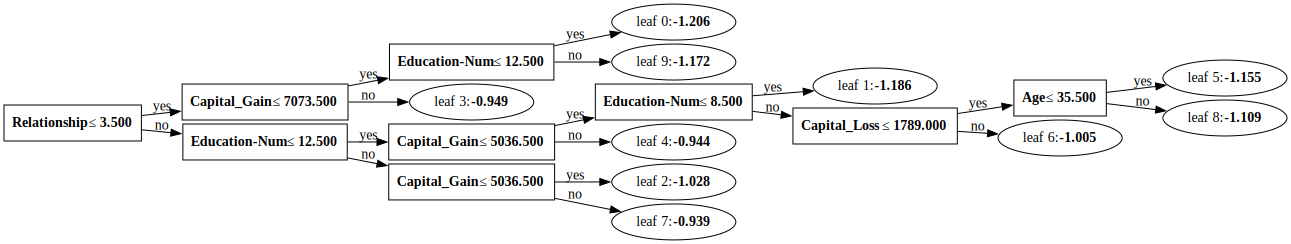

In [37]:
lgb.create_tree_digraph(model_1000)

In [38]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

In [39]:
shap.force_plot(shap_values[0])

In [40]:
shap.force_plot(shap_values[10])

In [41]:
shap.plots.force(shap_values[0:100])

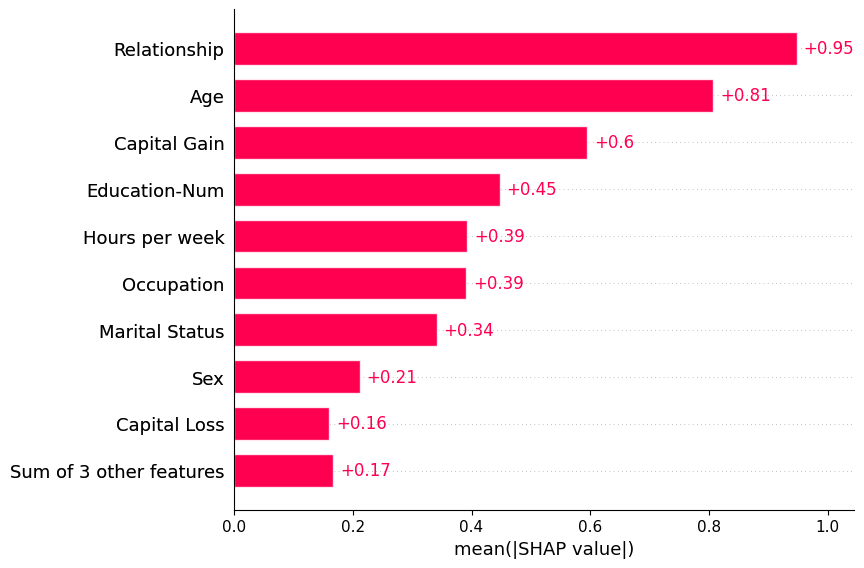

In [42]:
shap.plots.bar(shap_values)